In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
datasetIndex = 2

if datasetIndex == 1:
    dataSetPath = r"E:\HITEC\CS 429 Introduction to Data Science\Lab\new_insurance_data.csv"
elif datasetIndex == 2:
    dataSetPath = r"E:\HITEC\CS 429 Introduction to Data Science\Lab\googleplaystore.csv"
elif datasetIndex == 3:
    dataSetPath = r"E:\HITEC\CS 429 Introduction to Data Science\Lab\heartDisease\3_framingham.csv"

dataSetName = os.path.basename(dataSetPath)


dataset = pd.read_csv(dataSetPath)
dataset.head()

print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

Dataset Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
****************************
Dataset Shape: (10841, 13)
****************************
Total Rows in dataset File: 10841


In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Dataset Shape after removing duplcates: (10358, 13)
****************************
Remaining Rows in Dataset: 10358
****************************
Total Duplicates: 483
Remaining Rows in Dataset: 8886
****************************
Removed Number of rows containing Null Values: 1472


In [6]:
df_categorical = cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime'])
le = LabelEncoder()

for col in df_categorical.select_dtypes(include=['object']).columns:
    df_categorical[col] = df_categorical[col].str.lower()
    df_categorical[col] = df_categorical[col].str.strip()
    
    df_categorical[col] = le.fit_transform(df_categorical[col])
 

df_categorical.shape

df_categorical.head()


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,5976,0,1180,47,5,0,72,1,9,526,107,14
1,2064,0,5912,25,17,0,72,1,11,449,952,14
2,7547,0,5669,333,12,0,72,1,9,106,424,14
3,6755,0,1943,88,15,0,72,4,9,777,2630,17
4,6035,0,5912,56,8,0,72,1,10,711,250,19


In [ ]:
#for col in df_categorical.columns: 
#    print(f"{col} -> {df_categorical[col].value_counts()}")

In [7]:
#dataset.describe()  
df_categorical.describe()  


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.00000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000,8886.000000
mean,4122.945870,16.827594,2953.426739,192.530160,7.585415,0.06876,69.194688,1.478168,62.314652,591.593518,1251.964101,16.387238
std,2361.174858,8.275979,1738.394946,140.410203,4.854236,0.25306,11.911421,1.016978,32.572233,318.430392,887.317135,6.941418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2070.250000,11.000000,1478.250000,67.000000,3.000000,0.00000,72.000000,1.000000,36.000000,333.000000,424.000000,12.000000
50%,4141.500000,14.000000,2928.500000,154.000000,7.000000,0.00000,72.000000,1.000000,65.000000,612.000000,1116.000000,16.000000
75%,6154.750000,25.000000,4456.750000,326.000000,12.000000,0.00000,72.000000,1.000000,93.000000,781.000000,2045.750000,19.000000
max,8173.000000,32.000000,5989.000000,412.000000,18.000000,1.00000,72.000000,5.000000,114.000000,1298.000000,2637.000000,30.000000


In [8]:
allDataset =  pd.concat([df_categorical, dataset["Rating"]], axis=1)

allDataset.shape
allDataset.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating
0,5976.0,0.0,1180.0,47.0,5.0,0.0,72.0,1.0,9.0,526.0,107.0,14.0,4.1
1,2064.0,0.0,5912.0,25.0,17.0,0.0,72.0,1.0,11.0,449.0,952.0,14.0,3.9
2,7547.0,0.0,5669.0,333.0,12.0,0.0,72.0,1.0,9.0,106.0,424.0,14.0,4.7
3,6755.0,0.0,1943.0,88.0,15.0,0.0,72.0,4.0,9.0,777.0,2630.0,17.0,4.5
4,6035.0,0.0,5912.0,56.0,8.0,0.0,72.0,1.0,10.0,711.0,250.0,19.0,4.3


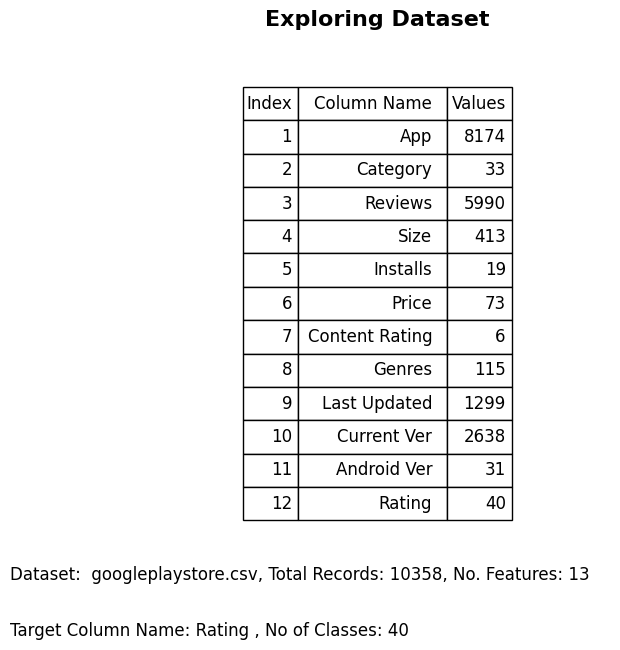

In [9]:
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []

df_combined = allDataset

columns = df_combined.__dataframe__().column_names() 
totalRecords = (df_combined.__dataframe__().num_rows())
for column in columns:
    singleColumnCount = df_combined[column].value_counts()
    if(len(singleColumnCount) > 2): 
        columnsForGraph.append(column)

tableDataRow = [ ['Index', 'Column Name', 'Values',], ]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = df_combined[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

 
# Determine the number of rows in the table (excluding the header)
num_rows = len(tableDataRow) + 1
# Calculate the desired figure size based on the number of rows
fig_width = 6  # Set the desired width of the figure
fig_height = num_rows * 0.5  # Adjust the scaling factor to control the height

fig, ax = plt.subplots(figsize=(fig_width, fig_height)) 
table = plt.table(cellText=tableDataRow, loc='center') 

table.auto_set_column_width(col=list(range(len(tableDataRow[0]))))

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 

dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, df_combined.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(df_combined[columns[-1]].value_counts())) 

fig.text(-0.1, +0.10,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.02,  target, horizontalalignment='left', wrap=False  , fontsize=12 )    

plt.axis('off')
plt.title(f'Exploring Dataset' ,fontsize=16, fontweight='bold') 

#mplot.savefig(picturePath,  dpi=300 )
plt.show()
plt.close()

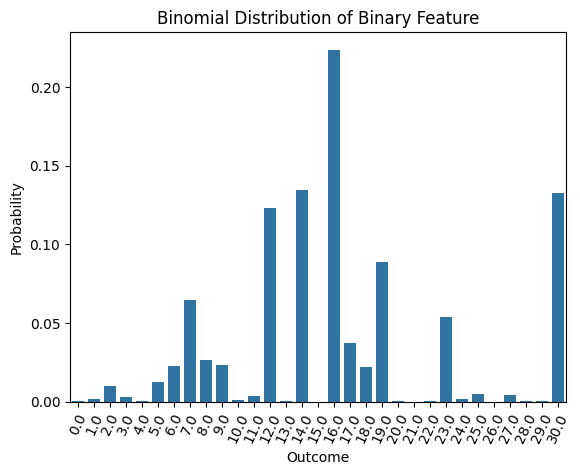

In [10]:
binary_feature = allDataset['Android Ver'] 

# Count occurrences of each category (0 and 1)
counts = binary_feature.value_counts(normalize=True)
# Plot binomial distribution
sns.barplot(x=counts.index, y=counts.values)
plt.title('Binomial Distribution of Binary Feature')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.xticks(rotation=65)

plt.show()

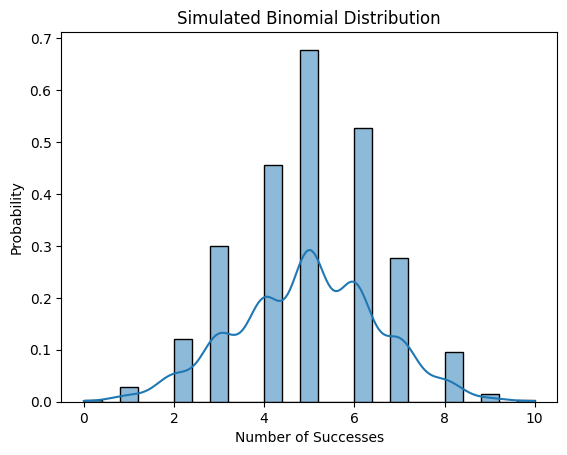

In [11]:
# Parameters for binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success on each trial
# Generate binomial distribution data
binom_data = np.random.binomial(n, p, size=1000)
# Plot histogram for binomial distribution
sns.histplot(binom_data, kde=True, stat="density")
plt.title('Simulated Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()


In [ ]:
# Example: Plotting the distribution of a numerical feature
numeric_feature = allDataset['Android Ver'] 
# Plot normal distribution
sns.histplot(numeric_feature, kde=True)
plt.title('Distribution of Numeric Feature')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(allDataset )
plt.title("Box Plot of Dataset for Outliers")
plt.xticks(rotation=65)
plt.show()


In [ ]:
allDatasetLowValues = allDataset.drop("App", axis=1)
allDatasetLowValues = allDatasetLowValues.drop("Reviews", axis=1)
allDatasetLowValues = allDatasetLowValues.drop("Current Ver", axis=1)
allDatasetLowValues = allDatasetLowValues.drop("Last Updated", axis=1)
allDatasetLowValues = allDatasetLowValues.drop("Size", axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(allDatasetLowValues )
plt.title("Box Plot of Dataset for Outliers")
plt.xticks(rotation=65)
plt.show()

In [ ]:
allDatasetLowValues = allDatasetLowValues.drop("Genres", axis=1) 
allDatasetLowValues = allDatasetLowValues.drop("Price", axis=1) 

plt.figure(figsize=(10, 6))
sns.boxplot(allDatasetLowValues )
plt.title("Box Plot of Dataset for Outliers")
plt.xticks(rotation=65)
plt.show()

In [12]:
# Calculate Pearson correlation
pearson_corr = df_categorical.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = df_categorical.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Pearson Correlation:
                      App  Category   Reviews      Size  Installs      Type  \
App             1.000000  0.010049 -0.007817  0.083610  0.025104  0.010442   
Category        0.010049  1.000000  0.022277  0.000255  0.002765  0.021084   
Reviews        -0.007817  0.022277  1.000000  0.001191  0.035555 -0.029282   
Size            0.083610  0.000255  0.001191  1.000000  0.043602 -0.039331   
Installs        0.025104  0.002765  0.035555  0.043602  1.000000 -0.036895   
Type            0.010442  0.021084 -0.029282 -0.039331 -0.036895  1.000000   
Price          -0.014217 -0.027386  0.018767  0.043465  0.032620 -0.866773   
Content Rating  0.047067 -0.105822  0.002295  0.068633  0.027668 -0.040742   
Genres          0.011608  0.771443  0.018448  0.002181 -0.003127  0.004666   
Last Updated   -0.048389 -0.034911 -0.013028 -0.079642  0.000682  0.018288   
Current Ver     0.063967  0.116811  0.022447  0.403319  0.024402 -0.075040   
Android Ver     0.091730  0.098863  0.0069

In [ ]:

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Define the mean (λ) for the Poisson distribution
lambda_value = 30  # Example: average rate is 5 events per interval
# Step 2: Generate Poisson-distributed data
poisson_data = np.random.poisson(lam=lambda_value, size=1000)
# Step 3: Plot the distribution
sns.histplot(poisson_data, bins=50, kde=False, stat="density")
plt.title('Simulated Poisson Distribution (λ = {})'.format(lambda_value))
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.show()


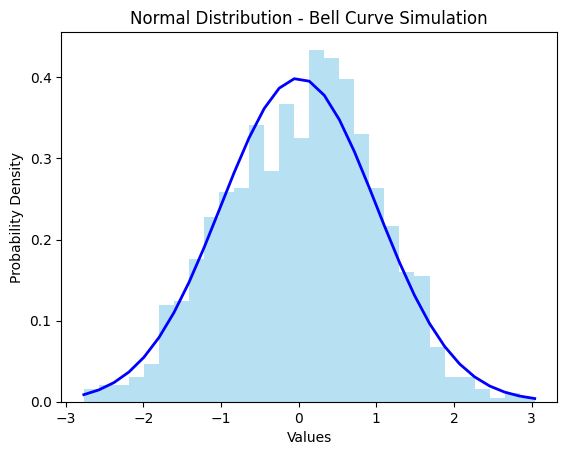

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean = 0      # Mean of the distribution
std_dev = 1   # Standard deviation of the distribution
# Generate 1000 values that follow a normal distribution
data = np.random.normal(mean, std_dev, 1000)
# Plot the histogram of the data with density=True for a probability density plot
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
# Plot the bell-shaped curve using the normal distribution's PDF
bell_curve = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(- (bins - mean)**2 / (2 * std_dev**2))
plt.plot(bins, bell_curve, linewidth=2, color='blue')
# Adding titles and labels
plt.title('Normal Distribution - Bell Curve Simulation')
plt.xlabel('Values')
plt.ylabel('Probability Density')

# Display the plot
plt.show()


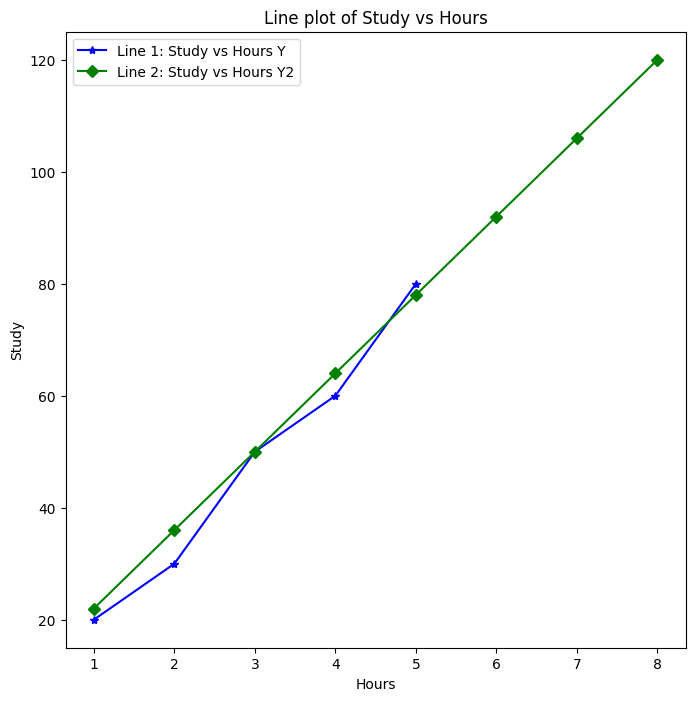

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8] 
y1 = [20, 30, 50, 60, 80]
y2 = [22, 36, 50, 64, 78, 92, 106, 120]


plt.figure(figsize=(8, 8))

plt.plot(x[:5], y1, color='blue', marker='*', label='Line 1: Training')
plt.plot(x, y2, color='green', marker='D', label='Line 2: Predicted')

plt.title('Line plot of Study vs Hours')
plt.xlabel('Hours')
plt.ylabel('Study')
plt.legend()

# Display the plot
plt.show()
